
G2M: Cab Industry
Week 2


<h2>Buisness Problem:</h2>


US cab company is majory of two kinds; Pink Cab and Yellow Cab. Our problem is to find out which Cab company would be good choice to invest in. For this purpose, we should find the advantages(profits) of that car compared to another one. Whichever cab company seems suitable in terms on market value, we would invest in that.


<h2>Packages</h2>
<p>Run the following cell to load all the packages </p>

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
df_cab = pd.read_csv('./dataset/DataSets/Cab_Data.csv')
df_city = pd. read_csv('./dataset/DataSets/City.csv')
df_customer_ID = pd.read_csv('./dataset/DataSets/Customer_ID.csv')
df_transaction_ID = pd.read_csv('./dataset/DataSets/Transaction_ID.csv')

In [3]:
df_cab


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [138]:
print(df_cab['Date of Travel'].value_counts())

43105    2022
43084    1123
43077    1100
43449    1086
43063    1085
         ... 
42388      88
42381      86
42380      85
42374      47
42373      25
Name: Date of Travel, Length: 1095, dtype: int64


<h3>Data transformation</h3>

<h6>Converting the date</h6>

Next, we will convert the date.

we are going to convert *the Date of Travel* field into an actual DateTime argument

In [4]:
from datetime import datetime
min_travel_date =df_cab['Date of Travel'].min()
max_travel_date =df_cab['Date of Travel'].max()
print('min_travel_date:',min_travel_date)
print('max_travel_date:',max_travel_date)

min_travel_date: 42371
max_travel_date: 43465


In [5]:

min_travel_date = datetime.fromordinal(min_travel_date-2+datetime(1900,1,30).toordinal()).strftime("%d-%m-%Y")
max_travel_date = datetime.fromordinal(max_travel_date-2+datetime(1900,1,30).toordinal()).strftime("%d-%m-%Y")
print('min_travel_date is: {}'.format(min_travel_date))
print('max_travel_date is: {}'.format(max_travel_date))

min_travel_date is: 31-01-2016
max_travel_date is: 29-01-2019


In [6]:
#let's do a function to do that for all the values 
def change_date(date):
    date_converted = datetime.fromordinal(datetime(1900,1,30).toordinal()+date-2).strftime("%d-%m-%Y")
    return datetime.strptime(date_converted, "%d-%m-%Y")


In [7]:
df_cab['Date of Travel'] = df_cab['Date of Travel'].apply(lambda x:change_date(x))

In [8]:
print(df_cab['Date of Travel'])

0        2016-02-06
1        2016-02-04
2        2016-01-31
3        2016-02-05
4        2016-02-01
            ...    
359387   2018-02-06
359388   2018-02-02
359389   2018-02-03
359390   2018-02-03
359391   2018-01-31
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]


In [199]:
df_city


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


<h6>remove commas in string in the 'population' and 'users'  fields of df_city</h6>

In [9]:
def remove_com(s):
    return int(s.replace(',', ''))
    

In [10]:
df_city['Population'] =df_city['Population'].apply(lambda x:remove_com(x))
df_city['Users'] =df_city['Users'].apply(lambda x:remove_com(x))

In [11]:
df_city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [153]:
df_customer_ID.head(3)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


In [154]:
df_transaction_ID.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


<h5>Missing values</h5>

messing values using *isna()*

In [166]:
df_cab.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [165]:
df_city.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [168]:
df_customer_ID.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [169]:
df_transaction_ID.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

<h6>we're lucky! there are no missing values </h6>

<h5>Creating MasterData</h5>

In [12]:
#merge df_cab, df_transaction_ID
df_cab_transaction_cust = pd.merge(df_cab, df_transaction_ID, on='Transaction ID')

df_cab_transaction_cust

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-02-06,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,2018-02-02,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,2018-02-03,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,2018-02-03,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [13]:
#merge df_cab_transaction_cust,df_customer_ID

df_cab_transaction_cust = pd.merge(df_cab_transaction_cust,df_customer_ID,on="Customer ID")
df_cab_transaction_cust

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,2018-02-05,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417
359388,10439799,2018-02-01,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash,Male,33,18713
359389,10439838,2018-02-02,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960
359390,10439840,2018-02-04,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454


In [14]:
df_cab_transaction_cust_city = pd.merge(df_cab_transaction_cust,df_city,on="City")
df_cab_transaction_cust_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-08-19,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-12-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-05-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-04-01,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001
359388,10319775,2018-05-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001
359389,10347676,2018-08-04,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001
359390,10358624,2018-08-31,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001


In [15]:
df=df_cab_transaction_cust_city
df.to_csv('./dataset/DataSets/MasterData.csv')

In [194]:
 print(df_cab[df_cab['Company']=="Pink Cab"]['Transaction ID'].sum())
 print(df_cab[df_cab['Company']=="Yellow Cab"]['Transaction ID'].sum())


866080030579
2807179773351


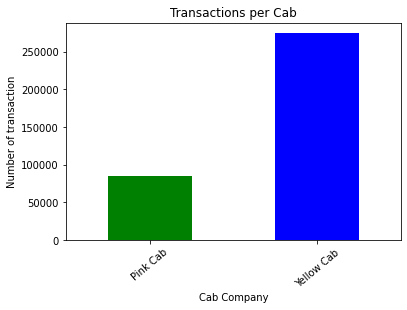

In [200]:
df_cab['Company'].value_counts(ascending=True).plot(kind='bar',color=['green', 'blue'], rot=40)
plt.xlabel('Cab Company')
plt.ylabel('Number of transaction')
plt.title('Transactions per Cab')
plt.show()

<h6>Conclusion:the number of Transaction for the Yellow Cab is </h6> 
<h6>3 times higher than the Pink Cab </h6>

<AxesSubplot:title={'center':' Transactions per city for each company'}, xlabel='Company', ylabel='count'>

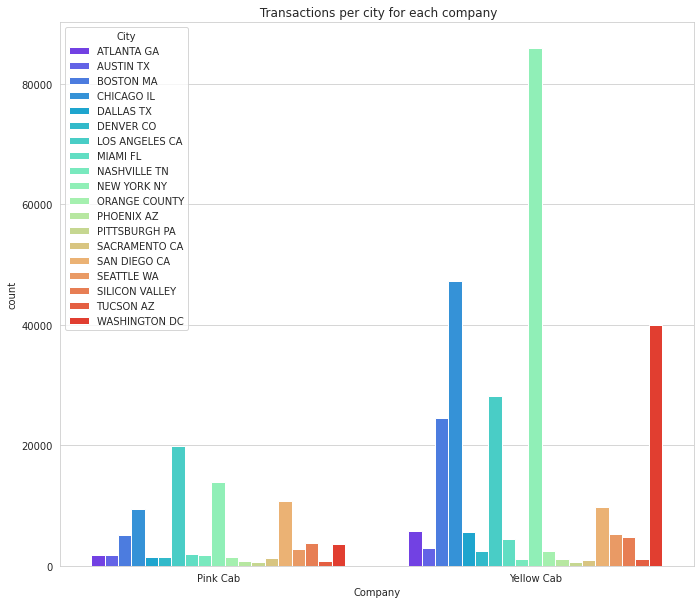

In [24]:
f = plt.figure(figsize=(25, 10))

f.add_subplot(1,2,1)
plt.title(" Transactions per city for each company")
sns.set_style("whitegrid")
sns.countplot(x="Company", hue='City',data=df_cab, orient='h', palette='rainbow')


<h6>The presence of the yellow cab  in cites  across the United States dominates  </h6>
<h6>The presence of the pink one</h6>

<h6>KM Travelled </h6>

<AxesSubplot:title={'center':'KM travelled by each company'}, xlabel='KM Travelled', ylabel='Count'>

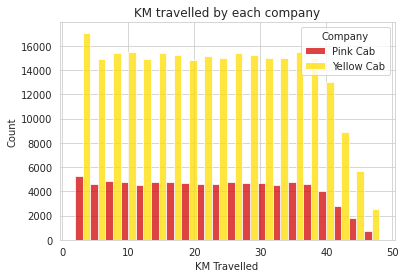

In [62]:
plt.title("KM travelled by each company")
sns.histplot(x='KM Travelled',hue="Company", data=df_cab, multiple='dodge', palette=["#d40404","#ffdd00"],bins=20 )

<h6>Activity and growth over years</h6>



In [43]:
df_cab_sorted = df_cab.sort_values(by="Date of Travel")

In [44]:
df_cab_sorted_company =df_cab_sorted.groupby('Company')

In [51]:
df_pink=df_cab_sorted_company.get_group("Pink Cab")

In [52]:
df_pink['Date of Travel']  = df_pink['Date of Travel'].apply(lambda x: x.year)


/tmp/ipykernel_5293/3132389828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pink['Date of Travel']  = df_pink['Date of Travel'].apply(lambda x: x.year)


<AxesSubplot:title={'center':'Activity over years for Pink cab'}, xlabel='Date of Travel', ylabel='Count'>

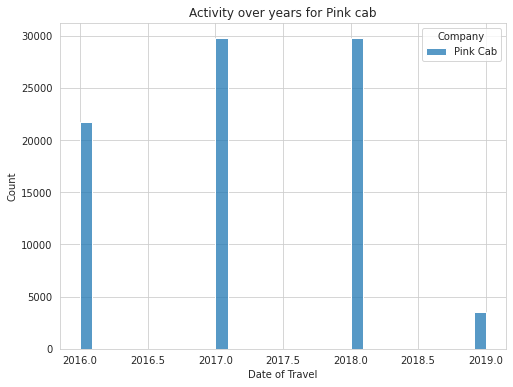

In [53]:
plt.figure(figsize=(8,6))
plt.title('Activity over years for Pink cab')
sns.histplot( x='Date of Travel', hue='Company', data=df_pink, multiple='dodge')

/tmp/ipykernel_5293/541559950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yellow['Date of Travel']  = df_yellow['Date of Travel'].apply(lambda x: x.year)


<AxesSubplot:title={'center':'Activity over years for Yellow cab'}, xlabel='Date of Travel', ylabel='Count'>

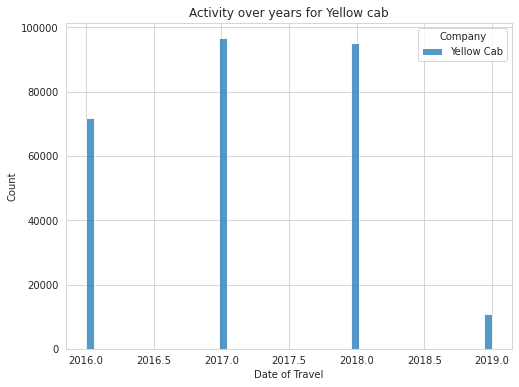

In [55]:
df_yellow=df_cab_sorted_company.get_group("Yellow Cab")
df_yellow['Date of Travel']  = df_yellow['Date of Travel'].apply(lambda x: x.year)
plt.figure(figsize=(8,6))
plt.title('Activity over years for Yellow cab')
sns.histplot( x='Date of Travel', hue='Company', data=df_yellow, multiple='dodge')


<h6>conclusion:Activity and growth over years</h6>
<br></br>
they have  the same growth rate. the activity shown in  2019 it's just for the first month of the year.<br><br></br>However the activity per year for the Yellow Cab is higer than the activity for the Pink Cab.<br></br> For exapmle in <strong>2016</strong> :<br></br>
<strong>70.000 transactions Yellow cab<br></br>
22.000 transactions Pink cab</strong>

<h6>Profit</h6>

In [77]:
#calculate profit
company_profit = pd.DataFrame(df_cab['Price Charged']-df_cab['Cost of Trip'], columns=["Profit"])
#add company_name to the profit
company_profit = pd.concat([df_cab['Company'],company_profit], axis=1,names=['Company', 'Profit'])


In [103]:
pink_profit=company_profit.groupby('Company').sum()
profit = pink_profit['Profit']

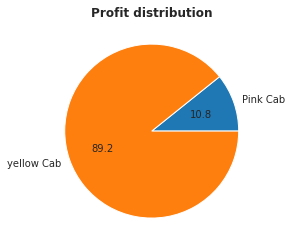

In [97]:
#pink_profit.get_group('Pink Cab')
plt.title('Profit distribution', fontweight="bold")
plt.pie(profit, labels = ['Pink Cab','yellow Cab' ], autopct='%.1f')
plt.show()

<h6>Conclusion: The yellow cab releases about 90% of the total profit </h6>

<h6>Profit Per Year</h6>

In [9]:
company_profit_year = pd.DataFrame(df_cab['Price Charged']-df_cab['Cost of Trip'], columns=["Profit"])
company_profit_year = pd.concat([df_cab['Company'],company_profit_year], axis=1,names=[ 'Company', 'Profit'])


In [10]:
company_profit_year = pd.concat([df_cab['Date of Travel'],company_profit_year], axis=1)

In [11]:
company_profit_year['Date of Travel']=company_profit_year['Date of Travel'].apply(lambda x :x.year)

In [28]:
pinkprofit=company_profit_year[company_profit_year.Company=='Pink Cab'].groupby(company_profit_year['Date of Travel']).Profit.mean()

In [30]:
yellowprofit=company_profit_year[company_profit_year.Company=='Yellow Cab'].groupby(company_profit_year['Date of Travel']).Profit.mean()

In [29]:
pinkprofit

Date of Travel
2016    63.864163
2017    66.459466
2018    56.538648
2019    74.704456
Name: Profit, dtype: float64

In [31]:
yellowprofit

Date of Travel
2016    171.379921
2017    169.083129
2018    145.837970
2019    134.707558
Name: Profit, dtype: float64

In [32]:
df = pd.DataFrame({'year': [2016, 2017, 2018, 2019],
                   'Pink Cab': [63.864163, 66.459466, 56.538648, 74.704456],
                   'Yellow Cab': [171.379921, 169.083129, 145.837970,134.707558 ]})

Text(0.5, 1.0, 'Profit Per Year')

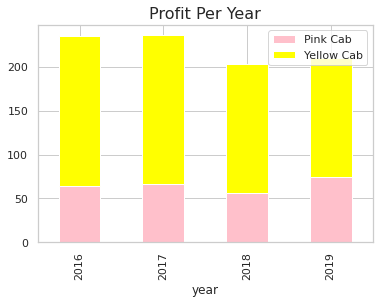

In [37]:
#set seaborn plotting aesthetics
sns.set(style='whitegrid')
#create stacked bar chart
df.set_index('year').plot(kind='bar', stacked=True, color=['Pink', 'yellow'])
plt.title('Profit Per Year', fontsize=16)


<h6>The YearWise profit confirms that the yellow cab is the most</h6>
<h6> profitable company in the Cub industry </h6>

<h6>let's look at the attribute of clients segmentation</h6>

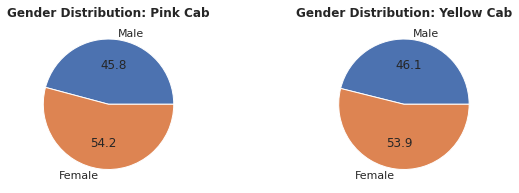

In [71]:
# create a custom table for genders
gender_table = df_cab_transaction_cust[["Company","Gender","Customer ID"]]
gender_table = gender_table.drop_duplicates(keep="first")

# plot
f = plt.figure(figsize=(15, 3))

# gender distribution: Pink Cab
f.add_subplot(1, 3, 2)

data = gender_table["Gender"].loc[gender_table['Company'] == "Pink Cab"]
data = pd.DataFrame(data, columns = ["Gender"])
data = data.groupby(by="Gender").size()

labels = gender_table["Gender"].drop_duplicates(keep="first")

plt.title("Gender Distribution: Pink Cab", fontweight="bold")
plt.pie(data, labels = labels, autopct='%.1f')
f.add_subplot(1, 3, 3)

# gender distribution: Yellow Cab
data = gender_table["Gender"].loc[gender_table['Company'] == "Yellow Cab"]
data = pd.DataFrame(data, columns = ["Gender"])
data = data.groupby(by="Gender").size()

labels = gender_table["Gender"].drop_duplicates(keep="first")

plt.title("Gender Distribution: Yellow Cab", fontweight="bold")
plt.pie(data, labels = labels, autopct='%.1f')
plt.show()

<h6>conclusion</h6>

Female Gender is higer than the males for both companies



In [51]:
df_cab_transaction_cust['Profit'] = df_cab_transaction_cust['Price Charged'] - df_cab_transaction_cust['Cost of Trip']


In [65]:
yellowprofit_gender=df_cab_transaction_cust[df_cab_transaction_cust.Company=='Yellow Cab'].groupby(df_cab_transaction_cust['Gender']).Profit.mean()

In [66]:
yellowprofit_gender

Gender
Female    156.305325
Male      163.150948
Name: Profit, dtype: float64

In [68]:
pinkprofit_gender_age=df_cab_transaction_cust[df_cab_transaction_cust.Company=='Pink Cab'].groupby(df_cab_transaction_cust['Gender']).Profit.mean()
pinkprofit_gender

Gender
Female    62.180701
Male      63.026310
Name: Profit, dtype: float64

<h6>conclusion</h6>

however the profit made by males is little bit higher than that made by man

In [74]:
df_cab_transaction_cust['Age'].unique()

array([28, 27, 53, 23, 33, 25, 19, 57, 20, 63, 58, 29, 38, 31, 40, 22, 18,
       34, 21, 24, 44, 30, 26, 46, 62, 47, 43, 32, 60, 52, 51, 48, 39, 45,
       61, 54, 37, 42, 41, 35, 36, 64, 55, 56, 59, 65, 50, 49])

<AxesSubplot:title={'center':'Age of customers'}, xlabel='Age', ylabel='Count'>

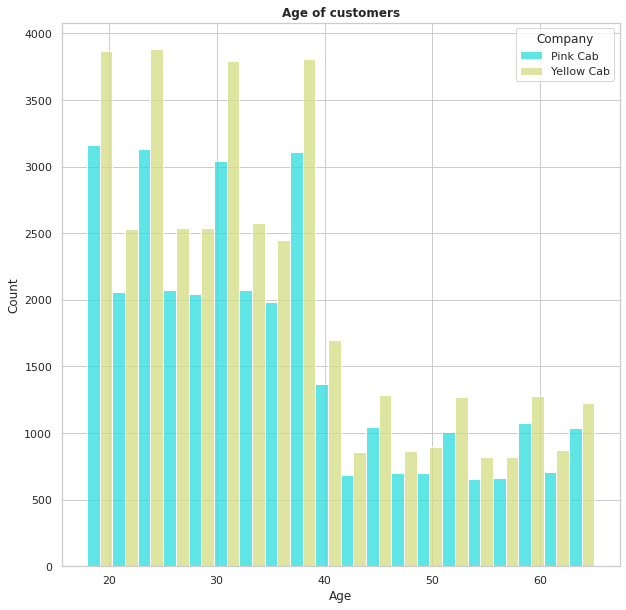

In [90]:
age_table = df_cab_transaction_cust[["Company","Age","Customer ID"]]
age_table = age_table.drop_duplicates(keep="first")

# plot
plt.figure(figsize=(10,10))
plt.title("Age of customers", fontweight="bold")
sns.set_style("whitegrid")
sns.histplot(data=age_table, x='Age', hue='Company', palette='rainbow', multiple='dodge',bins=20)

<h6>This graph shows the distribution of customers age :the bigest category is </h6>
<h6>between 18 and 39 years old.</h6>
<h6>we have also a considreable number of clients with an age range between 40 and 65 </h6>

<AxesSubplot:title={'center':'Total Transactions by Payment Mode'}, xlabel='Company', ylabel='count'>

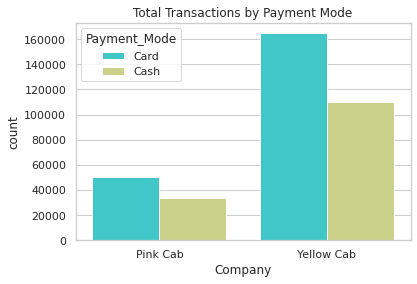

In [80]:

plt.title("Total Transactions by Payment Mode")
sns.set_style("whitegrid")
sns.countplot(x="Company", hue="Payment_Mode", data=df_cab_transaction_cust, orient="h", palette="rainbow")

<h6>The most used mode of payment for both companies is card</h6>